In [16]:
#Importing all the necessay libraries 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering



                                Steps Taken:
1. Loaded the democracy_index.csv data and verify the dataset.
2. clean up the data by checking the missing valuses. Removed spaces from columns name to prevent any syntax issue arises .
3. Replaced zero values with the mean of each category.
4. Standardized the data by using the StandardScaler()
5. Used the sum of squared distance to find the K for k-means
6. Applied the clustering to standadize the data and used PCA (Principal component analysis) to reduce dimensions for visualization.
7. Creare dedogram using the ward and complete method and applied agglomerative clustering with n_clusters = 4
8. Plotted K means clustering result and density democracy index valuses per clusters and showed each respected countires that falls under
   the clusters.

                               Insights of the Data:
   Counties grouped into 4 clusters using K-means clustering and Hiearachical clustering which alligned with:
     1. Full democracies
     2. Flawed Democracies
     3. Hybrid regimes
     4. Authoritarian regeims

   * PCA helped visualize K-means clusters which shown clean and separation among the democracy regimes.
   * Elbow method plot showed clear K values which helped to do the clustering and get the significant result. 
   * Density plots confimed that clusters align with democracy index values.

In [19]:
#Importing the given dataset for clusterting
#Load the democracy index dataset
#Ensured the dataset is in the same directory as provided.
dataset = pd.read_csv('democracy_index.csv')

In [21]:
#priting the dataset  first few rows to see what is in the dataset
print(dataset)

     Unnamed: 0 rank                           country  democracy_index  \
0             0    1                            Norway             9.87   
1             1    2                           Iceland             9.58   
2             2    3                            Sweden             9.39   
3             3    4                       New Zealand             9.26   
4             4    5                           Denmark             9.22   
..          ...  ...                               ...              ...   
162         162  163                              Chad             1.61   
163         163  164          Central African Republic             1.52   
164         164  165  Democratic Republic of the Congo             1.49   
165         165  166                             Syria             1.43   
166         166  167                       North Korea             1.08   

     electoral_processand_pluralism  functioning_of_government  \
0                             10.

In [23]:
#Priting first 5 dataset of the data.
print((dataset).head)

<bound method NDFrame.head of      Unnamed: 0 rank                           country  democracy_index  \
0             0    1                            Norway             9.87   
1             1    2                           Iceland             9.58   
2             2    3                            Sweden             9.39   
3             3    4                       New Zealand             9.26   
4             4    5                           Denmark             9.22   
..          ...  ...                               ...              ...   
162         162  163                              Chad             1.61   
163         163  164          Central African Republic             1.52   
164         164  165  Democratic Republic of the Congo             1.49   
165         165  166                             Syria             1.43   
166         166  167                       North Korea             1.08   

     electoral_processand_pluralism  functioning_of_government  \
0  

In [25]:
#Handling the missing valuse and counting missing values per column
print(dataset.isnull().sum())


Unnamed: 0                        0
rank                              0
country                           0
democracy_index                   0
electoral_processand_pluralism    0
functioning_of_government         0
political_participation           0
political_culture                 0
civil_liberties                   0
category                          0
dtype: int64


In [27]:
# Strip spaces from column names if exist any.
dataset.columns = dataset.columns.str.strip()

In [29]:
'''
To cluster countries based on the five categories (Electoral Process, Functioning of Government, Political 
Participation, Political Culture, and Civil Liberties), We want to create a  matrix that includes these columns

'''

zero_not_accepted = [
    'electoral_processand_pluralism', 
    'functioning_of_government',
    'political_participation',
    'political_culture',
    'civil_liberties'
]


In [31]:
#Looping through the columns to replace zeros with the mean value
for column in zero_not_accepted:
    # Ensure column exists BY lopoping thorugh
    if column in dataset.columns: 
        dataset[column] = dataset[column].replace(0, np.NaN) #Replace 0 with NaN
        mean = dataset[column].mean(skipna=True)  
        # Replacing NaNs with mean
        dataset[column] = dataset[column].fillna(mean)  

In [33]:
#Checking if there is empty or missing dataset  True/flase
print(dataset.isnull().values.any())


False


In [35]:
# Normalize the features. Scalling is necessay since K means is distance based, i need to standardize features to maintain uniform scale.
X = dataset[zero_not_accepted] #Selecting features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #Standardize features


In [37]:
#Checking before vs after scalling results
zero_not_accepted = ['electoral_processand_pluralism', 
    'functioning_of_government',
    'political_participation',
    'political_culture',
    'civil_liberties']

print("Before Scaling:\n", X.head())
print("After Scaling:\n", X_scaled[:10])

Before Scaling:
    electoral_processand_pluralism  functioning_of_government  \
0                           10.00                       9.64   
1                           10.00                       9.29   
2                            9.58                       9.64   
3                           10.00                       9.29   
4                           10.00                       9.29   

   political_participation  political_culture  civil_liberties  
0                    10.00              10.00             9.71  
1                     8.89              10.00             9.71  
2                     8.33              10.00             9.41  
3                     8.89               8.13            10.00  
4                     8.33               9.38             9.12  
After Scaling:
 [[1.17521116 1.94774983 2.53899474 2.68165664 1.49407267]
 [1.17521116 1.79969849 1.94570167 2.68165664 1.49407267]
 [1.03122659 1.94774983 1.64638265 2.68165664 1.37830747]
 [1.17521116 1.799

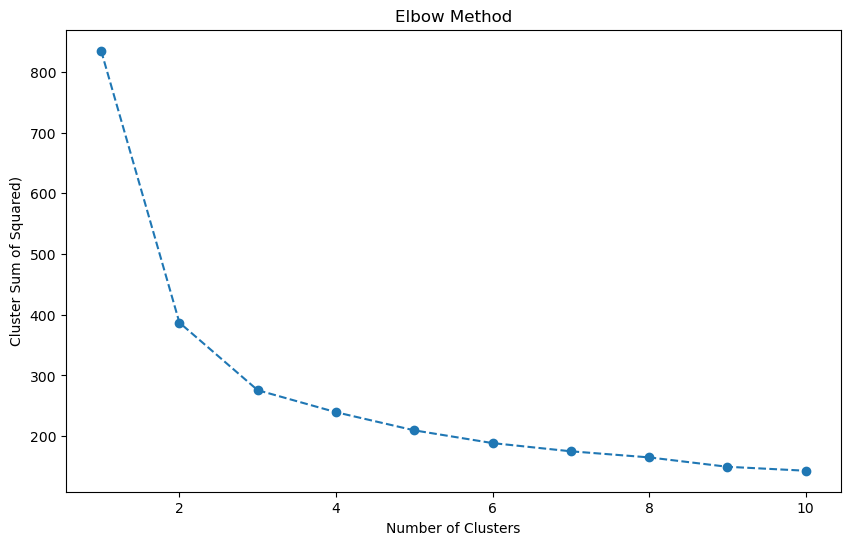

In [39]:
# Determine optimal k using the Elbow Method. Elbow method is needed to determine the numbers of clusters in unsupervised learning. In this case we 
#already knew there are 4 regimes so we could direclty set  k. but it is useful for us to check the k to ensure if the data is matchin with the expectations. 
css = [] #List to store cluster sum of squared errors 
for i in range(1, 11):  # Checking cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    css.append(kmeans.inertia_)

# Plotting  the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), css, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Sum of Squared)")
plt.title("Elbow Method")
plt.show()


In [41]:
# Getting K = 4 based on the cluster method after plotting the graph. 
# Define the number of clusters
k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

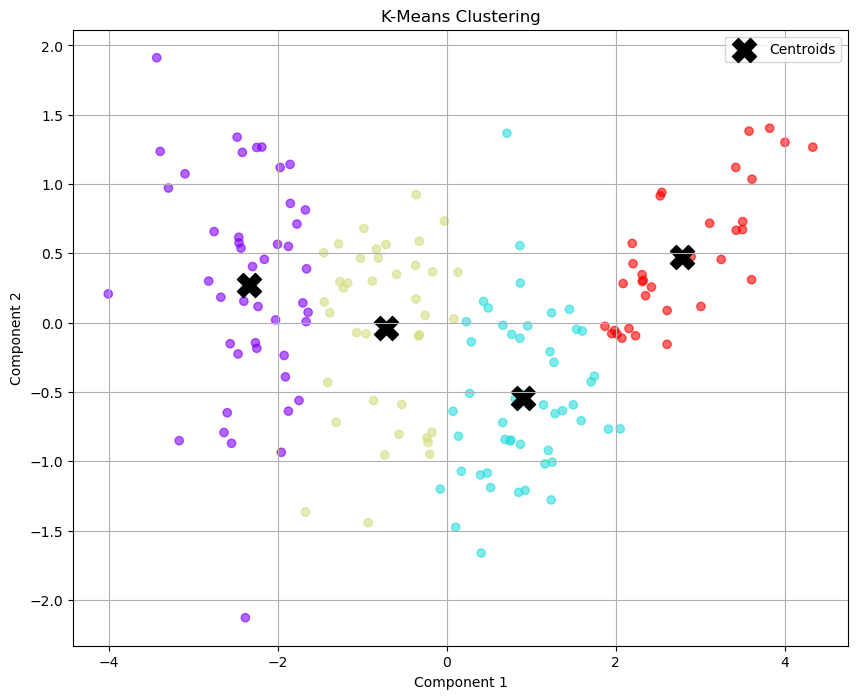

In [43]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Appling  K-Means on PCA transformed data
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)  # Use X_pca for clustering

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()


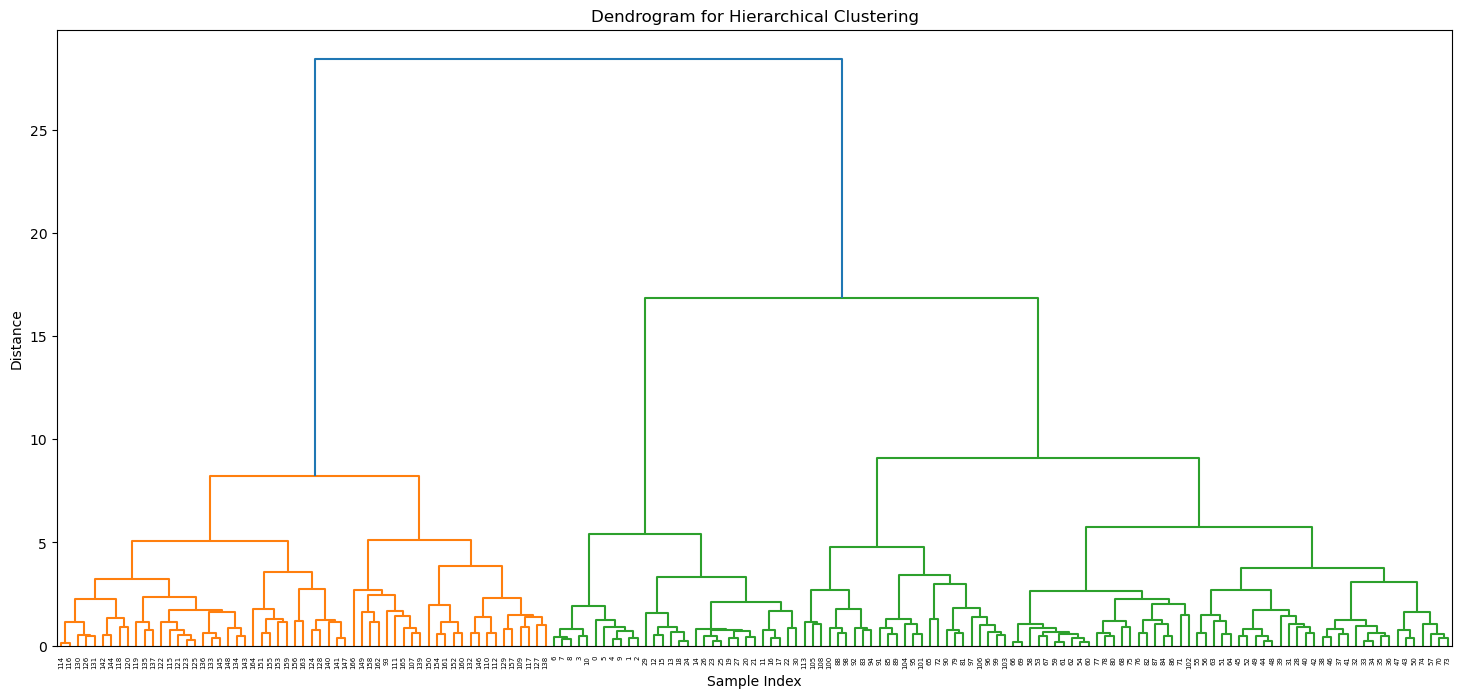

In [45]:
                                            # Hierarchical Clustering
# Creating a dendogram
plt.figure(figsize=(18, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


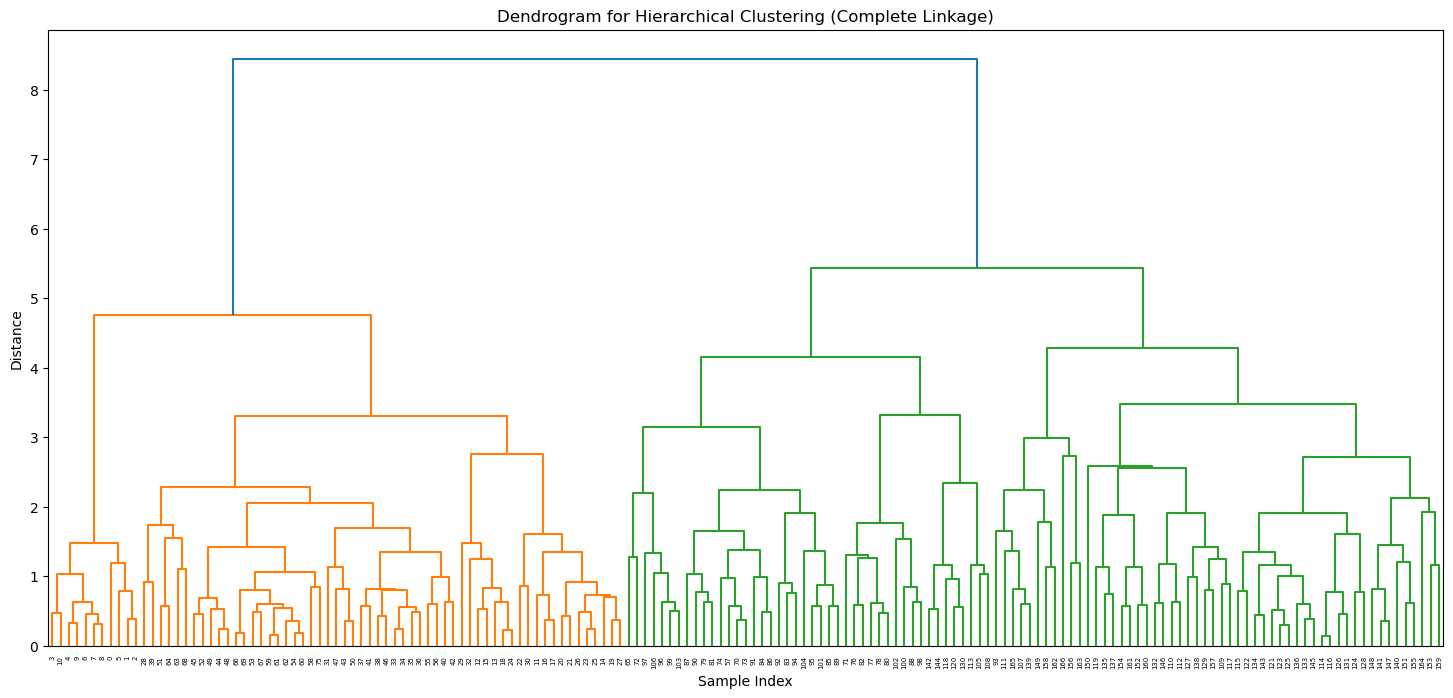

In [47]:
# Creating a dendrogram with the 'complete' linkage method
plt.figure(figsize=(18, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='complete'))
plt.title("Dendrogram for Hierarchical Clustering (Complete Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

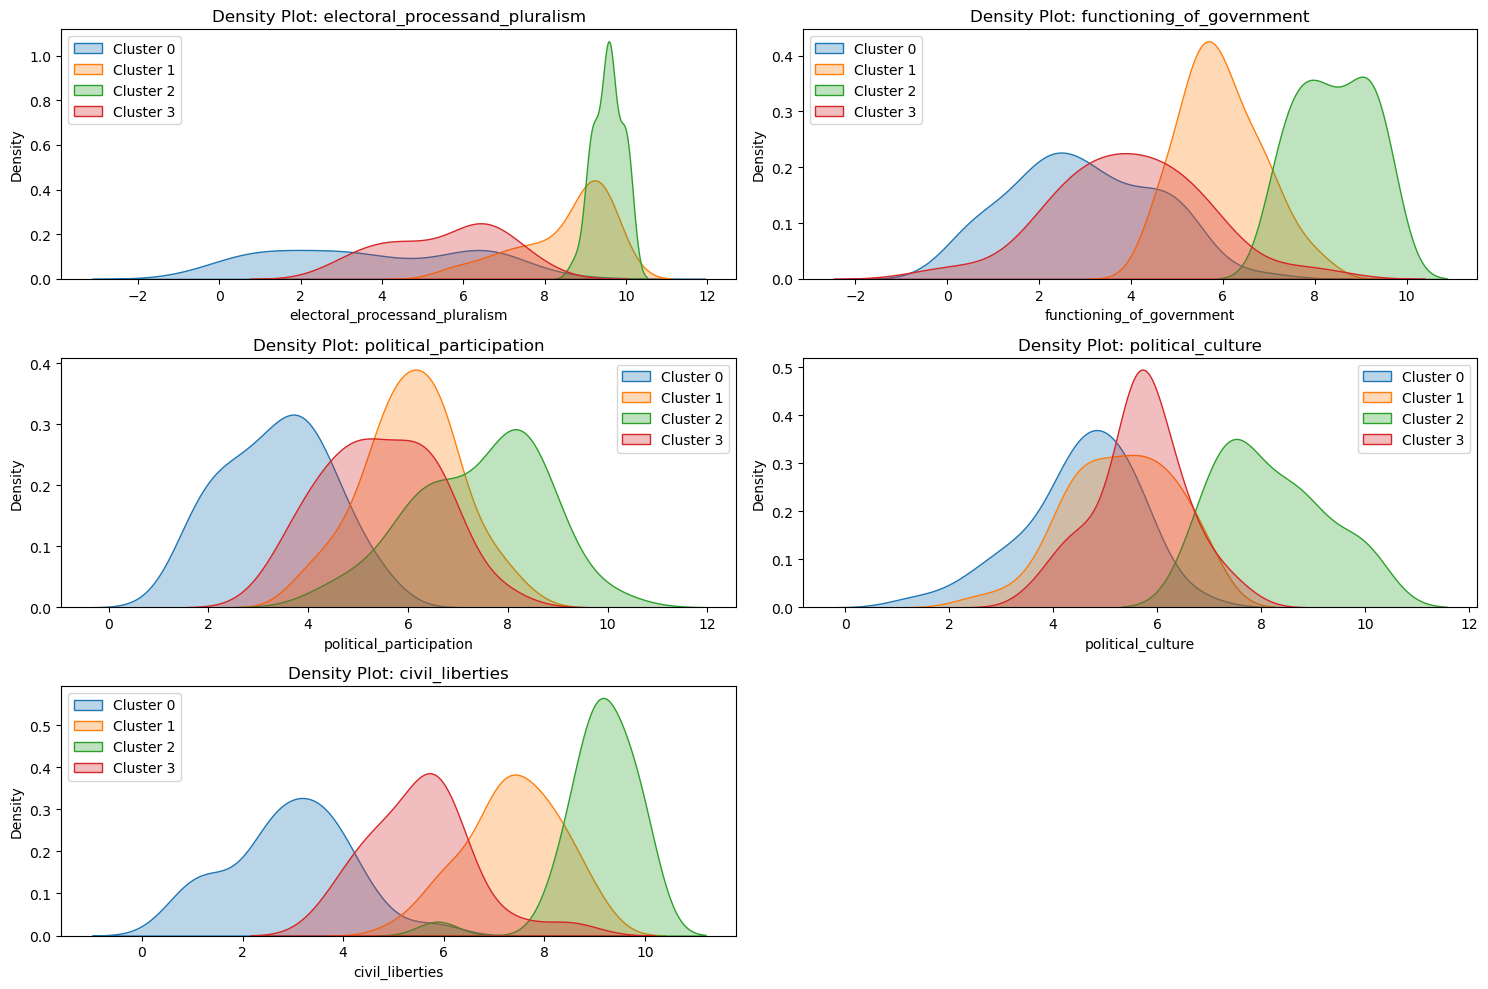

In [49]:

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
dataset['Cluster_Hierarchical'] = hierarchical.fit_predict(X_scaled)

# Defining k=4 for plotting
k = 4  # Using the same number of clusters as in hierarchical clustering

# Plot density 
plt.figure(figsize=(15, 10))
for i, feature in enumerate(zero_not_accepted, 1):
    plt.subplot(3, 2, i)
    for cluster in range(k):  
        cluster_data = dataset[dataset['Cluster_Hierarchical'] == cluster][feature]
        sns.kdeplot(data=cluster_data, label=f'Cluster {cluster}', fill=True, alpha=0.3)
    plt.title(f'Density Plot: {feature}')
    plt.legend()
plt.tight_layout()
plt.show()


In [51]:
# Verify countries in each cluster
for cluster in range(k):  # Looping through each cluster
    countries_in_cluster = dataset[dataset['Cluster_Hierarchical'] == cluster]['country']
    print(f"Cluster {cluster} contains the following countries:")
    print(countries_in_cluster.tolist())  # Output list of countries in each cluster



Cluster 0 contains the following countries:
['Bhutan', 'Nigeria', 'Turkey', 'Gambia', 'Pakistan', 'Ivory Coast', 'Jordan', 'Mozambique', 'Kuwait', 'Myanmar', 'Mauritania', 'Niger', 'Comoros', 'Nicaragua', 'Angola', 'Gabon', 'Cambodia', 'Algeria', 'Egypt', 'Ethiopia', 'Rwanda', 'China', 'Republic of the Congo', 'Cameroon', 'Qatar', 'Zimbabwe', 'Venezuela', 'Guinea', 'Belarus', 'Togo', 'Vietnam', 'Oman', 'Swaziland', 'Cuba', 'Afghanistan', 'Kazakhstan', 'Russia', 'Djibouti', 'United Arab Emirates', 'Bahrain', 'Azerbaijan', 'Iran', 'Eritrea', 'Laos', 'Burundi', 'Libya', 'Sudan', 'Uzbekistan', 'Guinea-Bissau', 'Yemen', 'Saudi Arabia', 'Tajikistan', 'Equatorial Guinea', 'Turkmenistan', 'Chad', 'Central African Republic', 'Democratic Republic of the Congo', 'Syria', 'North Korea']
Cluster 1 contains the following countries:
['France', 'Republic of China (Taiwan)', 'Italy', 'Czech Republic', 'Cyprus', 'Slovenia', 'Lithuania', 'Latvia', 'Greece', 'South Africa', 'India', 'Timor-Leste', 'Trinid

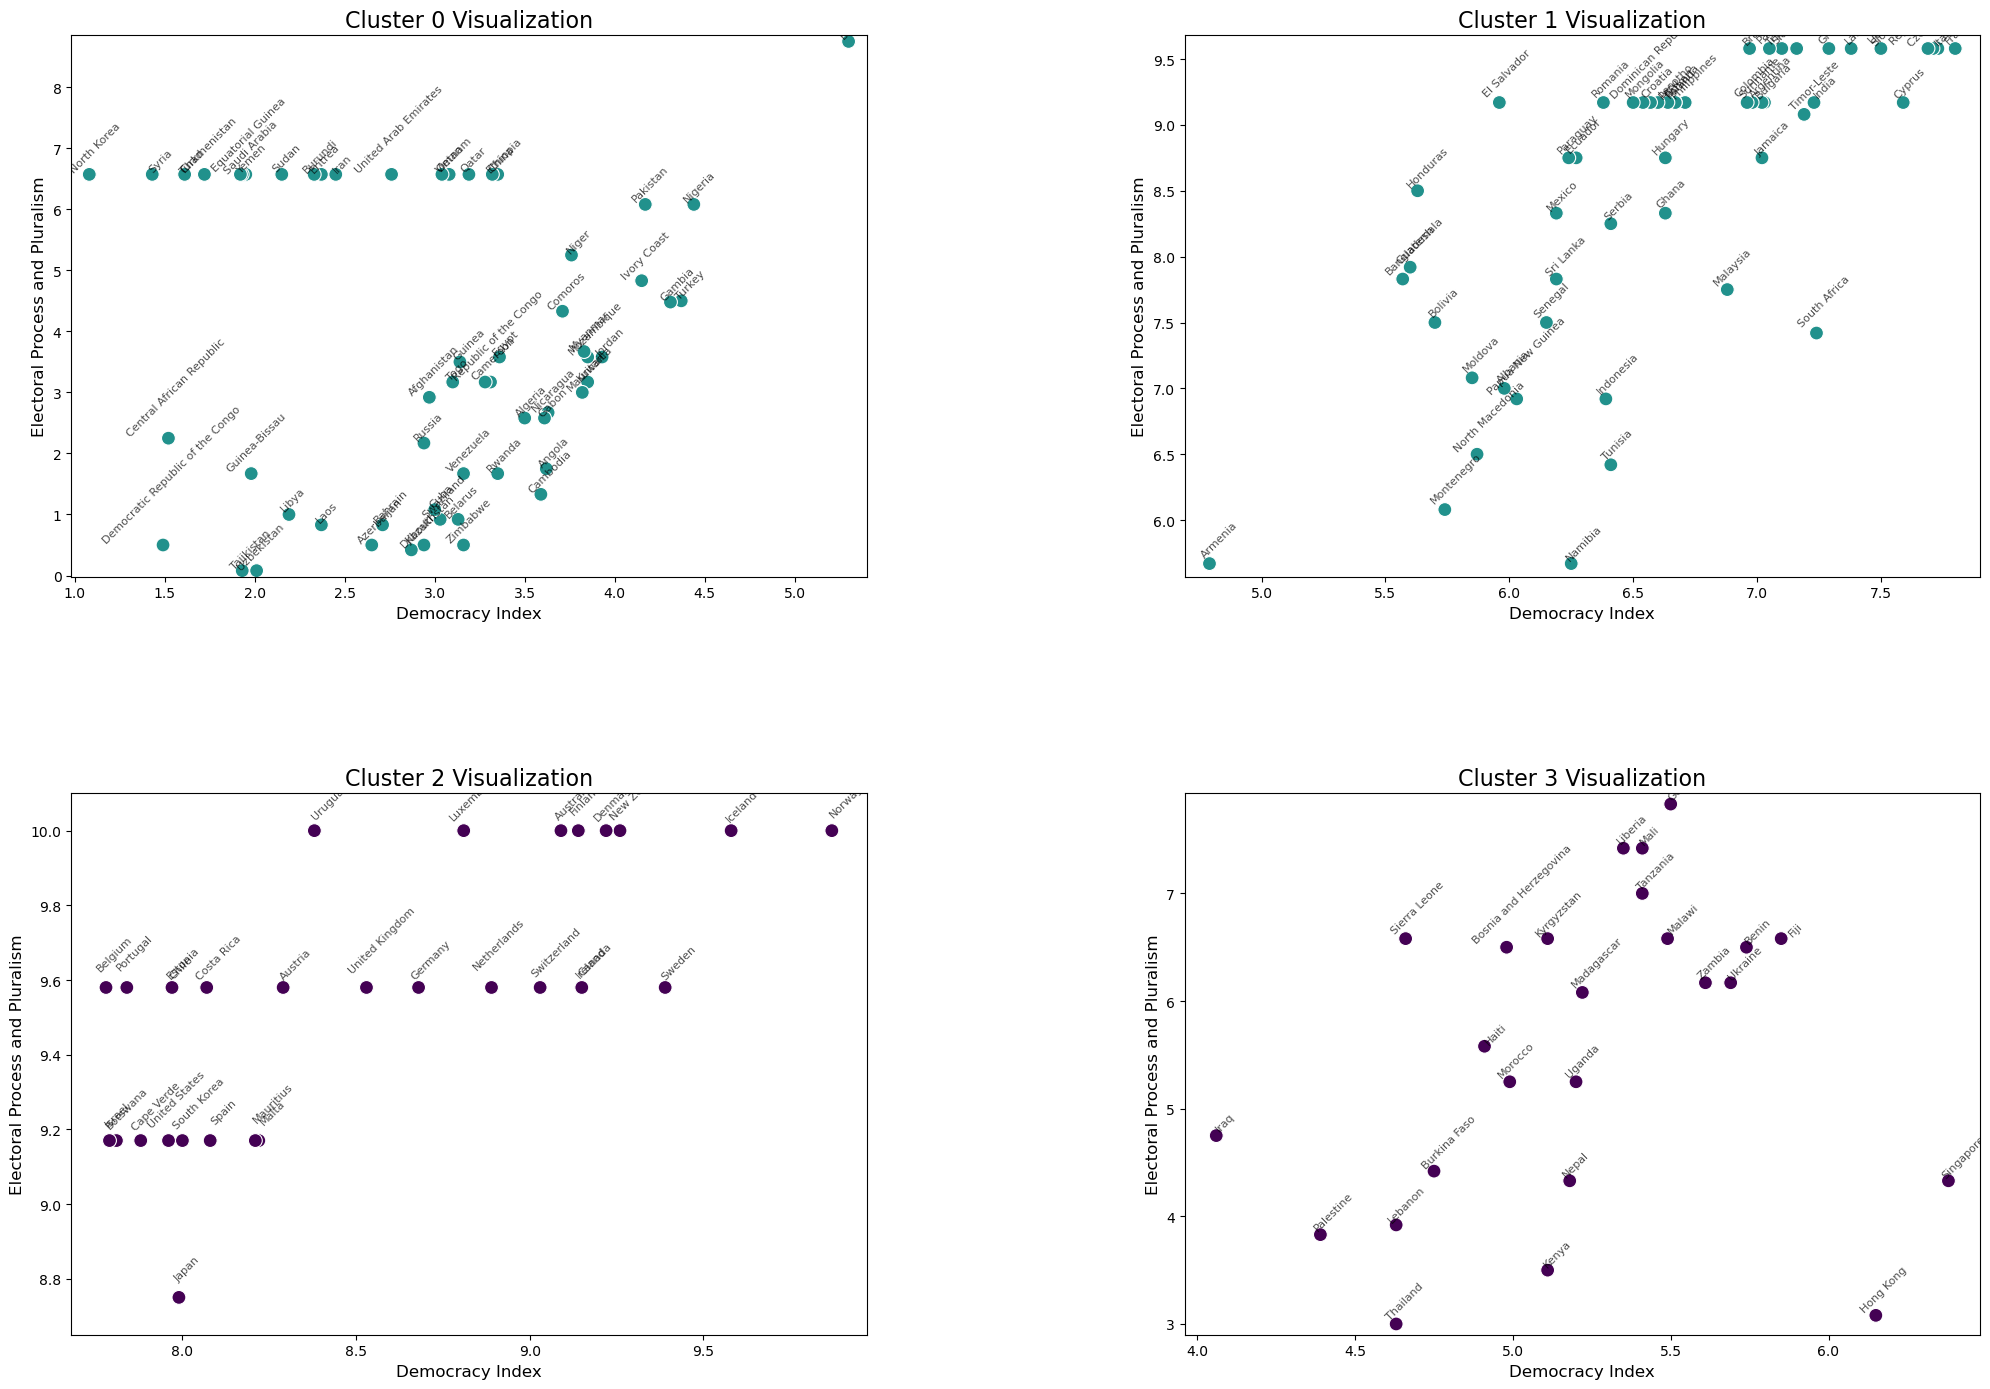

In [53]:
# Creating  a new figure with 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Define clusters
cluster_labels = [0, 1, 2, 3]

# Loop through each cluster and create a plot for each
for i, cluster in enumerate(cluster_labels):
    ax = axes.flatten()[i]
    
    # Filter the dataset for the current cluster
    cluster_data = dataset[dataset['Cluster_Hierarchical'] == cluster]
    
    # Scatter plot for the selected feature, colored by clusters
    sns.scatterplot(x=cluster_data['democracy_index'], 
                    y=cluster_data['electoral_processand_pluralism'], 
                    hue=cluster_data['Cluster_Hierarchical'], 
                    palette='viridis', 
                    s=100, 
                    ax=ax, 
                    legend=None)
    
    # Annotate each country in the respective cluster
    for j in range(len(cluster_data)):
        x_pos = cluster_data['democracy_index'].iloc[j]
        y_pos = cluster_data['electoral_processand_pluralism'].iloc[j]
        country = cluster_data['country'].iloc[j]
        
        # Add slight random offsets for readability
        label = ax.text(x_pos + np.random.uniform(0.02, 0.05), 
                        y_pos + np.random.uniform(0.02, 0.05), 
                        country, fontsize=8, alpha=0.7, 
                        horizontalalignment='center', rotation=45)
        
        # Limit the placement of the text to stay within the plot boundaries
        label.set_clip_on(True)

    # Setting the title and axis labels for each plot
    ax.set_title(f"Cluster {cluster} Visualization", fontsize=16)
    ax.set_xlabel('Democracy Index', fontsize=12)
    ax.set_ylabel('Electoral Process and Pluralism', fontsize=12)
    
    # Adjust axes limits to give more room for text and prevent clipping
    ax.set_xlim(cluster_data['democracy_index'].min() - 0.1, cluster_data['democracy_index'].max() + 0.1)
    ax.set_ylim(cluster_data['electoral_processand_pluralism'].min() - 0.1, cluster_data['electoral_processand_pluralism'].max() + 0.1)

# Adjust layout and spacing for better readability
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

   

                                            Challanges Faced 
1. Since the project was invloved clustering democracy index data, it required a lot of research on the dataset and the meaning of different democracy scores and the grop of countires based on the political regimes.
2. In the initial part of my project the data did not cluster well and the centroids were not forming meaningful groupls. all the data were all over place in the daataset. Had deep dive in and research a lot to do the mulitple iterations of feature selection,scalling to ensure logicial cluster separation.
3. Some counties were getting grouped increctly due to overlappin scores, it was difficult to differentiate between flawed democracies, hybrid regimes and authoritarian states.
4. K means is higly sensetive to different features scales, Applying StandardScaler helped to resolve the clustering reslutls.
5. The elbow method suggested different possible clusters value, After multiple tests k= 4 was choses and fit the best with the test.
6. The dendogram was to interpret, when using linkage or different distance metrics.
7. When plotting countires in clusters, some countires are overlapping with each other in the plot and plot was pretty messy. To improve that part had to take lot steps to make sure plots looks better for viewer to visualize. 